In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VARMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
data = yf.download('RELIANCE.NS', end = '2024-12-24')

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,,
1996-01-01,3.705897,7.345901,7.358397,7.270925,7.319124,104121369
1996-01-02,3.677078,7.288776,7.363753,7.235222,7.328050,168743308
1996-01-03,3.704997,7.344116,7.745775,7.328050,7.408381,209323879
1996-01-04,3.670774,7.276280,7.297702,7.178097,7.274495,216900264
1996-01-05,3.645557,7.226296,7.247718,7.163816,7.247718,166708467


In [ ]:
train = data['Close'][:int(0.8*(len(data)))].dropna()
test = data['Close'][int(0.8*(len(data))):].dropna()

In [ ]:
new_train = data['Close']

## Building SARIMA Model

In [ ]:
p_train = train.values

In [ ]:
model = SARIMAX(p_train, order=(2, 2, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

In [ ]:
SARIMA_predictions = model_fit.predict(start = len(train), end = len(train)+len(test)-1, dynamic=False)

In [ ]:
SARIMA_error = mean_squared_error(test,SARIMA_predictions)
SARIMA_error = np.sqrt(SARIMA_error)
print(f"Root Mean Squared Error (MSE): {SARIMA_error}")

Root Mean Squared Error (MSE): 268.2582974803032


In [ ]:
SARIMA_predictions = pd.Series(SARIMA_predictions, index=test.index)

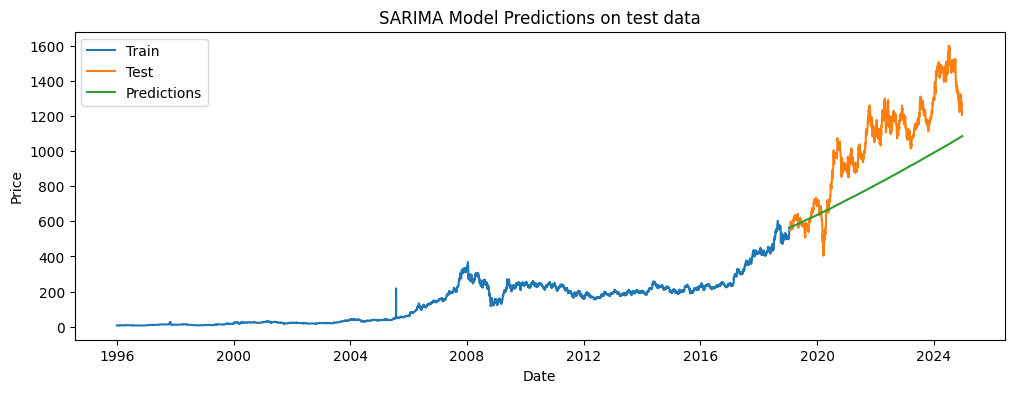

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(SARIMA_predictions, label='Predictions')
plt.title('SARIMA Model Predictions on test data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
model = SARIMAX(new_train, order=(2, 2, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
SARIMA_future_predictions = model_fit.predict(start=len(new_train), end=len(new_train) + 30, dynamic=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
SARIMA_future_predictions.index = pd.date_range(start=new_train.index[-1], periods=31, freq='D')

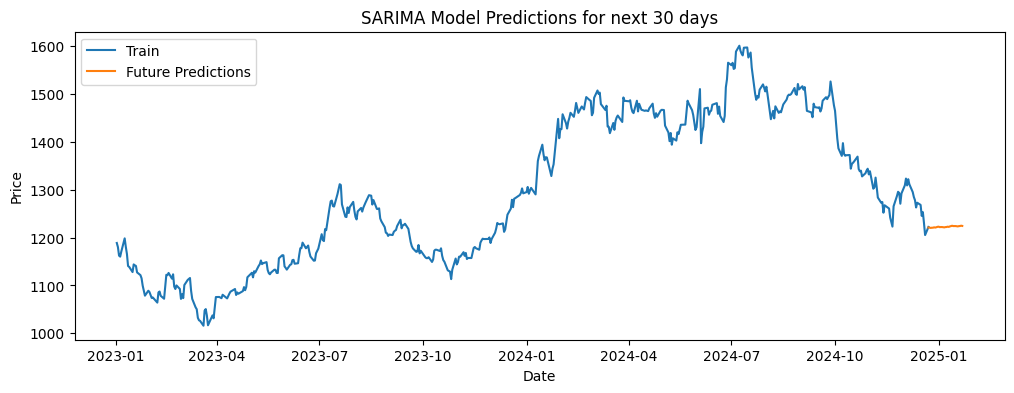

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(new_train['2023-01-01':], label='Train')
plt.plot(SARIMA_future_predictions, label='Future Predictions')
plt.title('SARIMA Model Predictions for next 30 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Building VARIMA Model

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7276 entries, 1996-01-01 to 2024-12-23
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   (Adj Close, RELIANCE.NS)  7276 non-null   float64
 1   (Close, RELIANCE.NS)      7276 non-null   float64
 2   (High, RELIANCE.NS)       7276 non-null   float64
 3   (Low, RELIANCE.NS)        7276 non-null   float64
 4   (Open, RELIANCE.NS)       7276 non-null   float64
 5   (Volume, RELIANCE.NS)     7276 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 655.9 KB


In [ ]:
data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,,
1996-01-01,3.705897,7.345901,7.358397,7.270925,7.319124,104121369
1996-01-02,3.677078,7.288776,7.363753,7.235222,7.328050,168743308
1996-01-03,3.704997,7.344116,7.745775,7.328050,7.408381,209323879
1996-01-04,3.670774,7.276280,7.297702,7.178097,7.274495,216900264
1996-01-05,3.645557,7.226296,7.247718,7.163816,7.247718,166708467


In [ ]:
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

In [ ]:
model = VARMAX(train, order=(2, 0, 1))
model_fit = model.fit()




/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/varmax.py:373: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [ ]:
forecast_steps = len(test)
forecast = model_fit.forecast(steps=forecast_steps)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
forecast.columns

Index(['Adj Close_RELIANCE.NS', 'Close_RELIANCE.NS', 'High_RELIANCE.NS',
       'Low_RELIANCE.NS', 'Open_RELIANCE.NS', 'Volume_RELIANCE.NS'],
      dtype='object')

In [ ]:
Close = forecast['Close_RELIANCE.NS']
Close.index = test.index

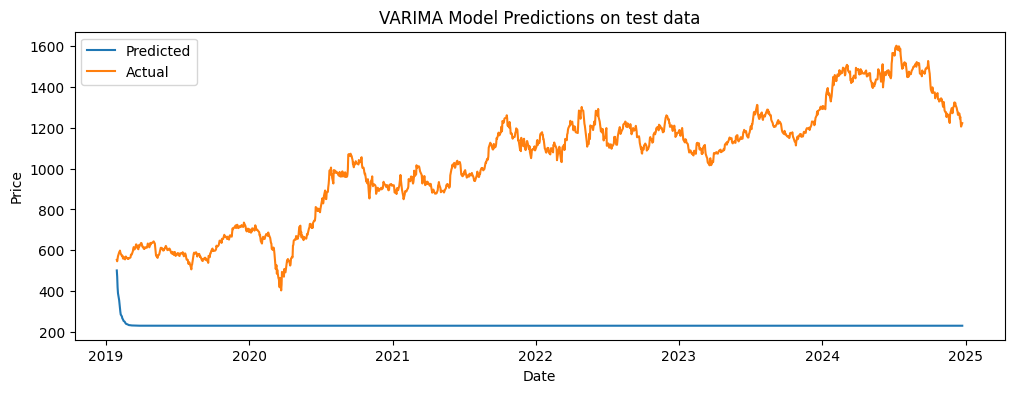

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(Close, label = 'Predicted')
plt.plot(test['Close'], label = 'Actual')
plt.title('VARIMA Model Predictions on test data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
forecast_steps = 30

forecast = model_fit.forecast(steps=forecast_steps)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
forecast

,Adj Close_RELIANCE.NS,Close_RELIANCE.NS,High_RELIANCE.NS,Low_RELIANCE.NS,Open_RELIANCE.NS,Volume_RELIANCE.NS
5820,468.255904,501.926991,526.144684,509.891812,541.763591,1.528302e+08
5821,439.242679,471.127869,493.011602,477.053422,503.051810,1.469288e+08
5822,388.987206,419.453767,438.862037,424.747824,445.235551,1.309825e+08
5823,361.992355,390.568628,407.671185,394.590150,411.887173,1.107868e+08
5824,328.892567,356.241400,371.474447,359.543275,374.177475,1.109567e+08
5825,309.731068,335.969975,349.723770,338.443554,351.272372,1.016103e+08
5826,288.780140,314.209199,326.690246,316.155116,327.278434,1.004902e+08
5827,275.564299,300.286755,311.775445,301.691752,311.592445,9.478314e+07
5828,262.171570,286.358343,297.007453,287.395362,296.185853,9.341809e+07
5829,253.142956,276.869613,286.858648,277.554547,285.522609,8.998913e+07


In [ ]:
pred = forecast['Close_RELIANCE.NS']
pred.index = pd.date_range(start=data.index[-1], periods=30, freq='D')

In [1]:
plt.figure(figsize=(12,4))
plt.plot(test['Close'], label='Testing Data')
plt.plot(pred, label='Prediction')
plt.title('VARIMA Model Predictions for next 30 days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
VARIMA_error = mean_squared_error(test['Close'], Close)
VARIMA_error = np.sqrt(VARIMA_error)
print(f"Root Mean Squared Error (MSE): {VARIMA_error}")

Root Mean Squared Error (MSE): 851.3049007365122


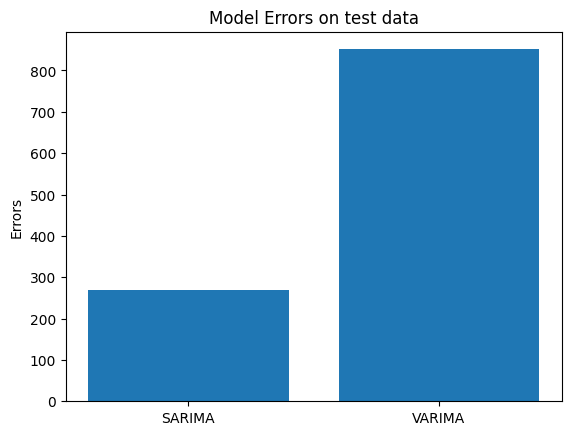

In [ ]:
err = [SARIMA_error,VARIMA_error]
plt.bar(x =['SARIMA','VARIMA'],height = err)
plt.title('Model Errors on test data')
plt.ylabel('Errors')
plt.show()